# Starting an NN journey

In [20]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from glob import glob
from os import path
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor, ToPILImage

In [21]:
torch.__version__

'1.3.1'

In [22]:
CUDA = torch.cuda.is_available()
CUDA

True

In [23]:
filenames = glob(path.join('/home/sergei','Pictures/','*.jpg'))

In [24]:
filenames[:4]

['/home/sergei/Pictures/Iceland.jpg',
 '/home/sergei/Pictures/IMG-20180527-WA0003.jpg',
 '/home/sergei/Pictures/участок-справа.jpg',
 '/home/sergei/Pictures/aster.jpg']

In [25]:
def process_image(imag_file_name):
    image = Image.open(imag_file_name)
    return(image)

In [26]:
im = process_image(filenames[0])

In [27]:
im.size

(1746, 1176)

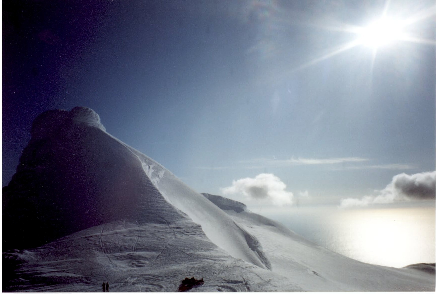

In [28]:
im.resize((int(im.size[0]/4), int(im.size[1]/4)))

In [29]:
im.getbands()

('R', 'G', 'B')

In [30]:
im.getbbox()

(0, 0, 1746, 1176)

In [104]:
iceland_tensor = transforms.ToTensor()(im)
iceland_tensor

tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.7765, 0.7804, 0.7922],
         [1.0000, 1.0000, 1.0000,  ..., 0.7804, 0.7843, 0.7922],
         [1.0000, 1.0000, 1.0000,  ..., 0.7804, 0.7843, 0.7922],
         ...,
         [0.9922, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         [0.9922, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.7961, 0.7922, 0.8039],
         [1.0000, 1.0000, 1.0000,  ..., 0.8000, 0.7961, 0.8039],
         [1.0000, 1.0000, 1.0000,  ..., 0.8000, 0.7961, 0.8039],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.8196, 0.8118, 0.8235],
         [1.0000, 1.0000, 1.0000,  ..., 0.8235, 0.8157, 0.8235],
         [1.0000, 1.0000, 1.0000,  ..., 0.8235, 0.8157, 0.

In [32]:
iceland_tensor.size()

torch.Size([3, 1176, 1746])

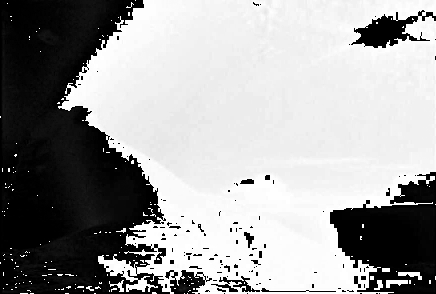

In [33]:
transforms.ToPILImage()(iceland_tensor[0] - iceland_tensor[1]).convert("P").resize((int(im.size[0]/4), int(im.size[1]/4)))

In [34]:
im_new = transforms.ToPILImage()(iceland_tensor).convert("RGB")

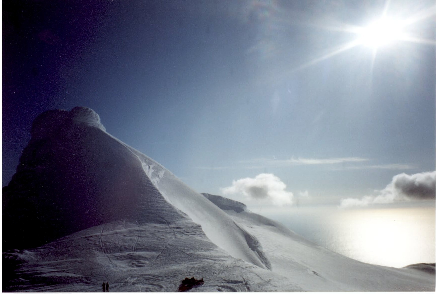

In [35]:
im_new.resize((int(im.size[0]/4), int(im.size[1]/4)))

In [79]:
imdata = im.getdata()

In [80]:
torch_image = torch.as_tensor(imdata, dtype=torch.float32)

In [213]:
torch_image.size()

torch.Size([2053296, 3])

### Understanding the image reshaping

In [125]:
im3  = Image.open(filenames[3])

In [144]:
# display image Width and Height
# im.size[0] and im.size[1] should be swapped (ie. reshape(im.size[1], im.size[0], 3)), 
# since size is width x height or x * y, while matrix ordering is rows x columns.
W, H = im3.size[0], im3.size[1]
W, H

(961, 215)

In [176]:
im3.getbbox()

(0, 0, 961, 215)

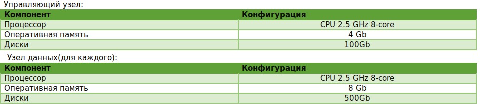

In [146]:
# display a small version of an image
im3.resize(size=(W//2, H//2))

In [158]:
# convert PIL image to a numpy
# note that shape of an array is reversed, cos Y, i.e. rows goes first
im3_array = np.array(im3)
im3_array.shape

(215, 961, 3)

In [159]:
im3_array[:2]

array([[[248, 255, 255],
        [254, 255, 255],
        [255, 249, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[249, 255, 255],
        [254, 255, 255],
        [255, 250, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)

In [149]:
# pytorch tensor is similar to np.array but color goes first
im3_tensor = transforms.ToTensor()(im3)
im3_tensor.size()

torch.Size([3, 215, 961])

In [154]:
im3_tensor[:,:2,:]

tensor([[[0.9725, 0.9961, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9765, 0.9961, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 0.9765,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 0.9804,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]]])

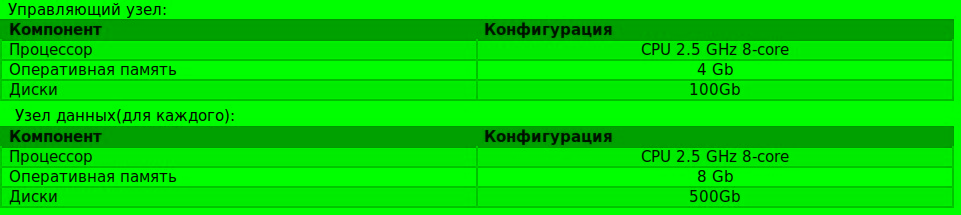

In [167]:
# now lets zero Red and Ble layers of an image
im3_array_green = np.copy(im3_array)
im3_array_green[:,:,0] = 0
im3_array_green[:,:,2] = 0
Image.fromarray(np.uint8(im3_array_green))

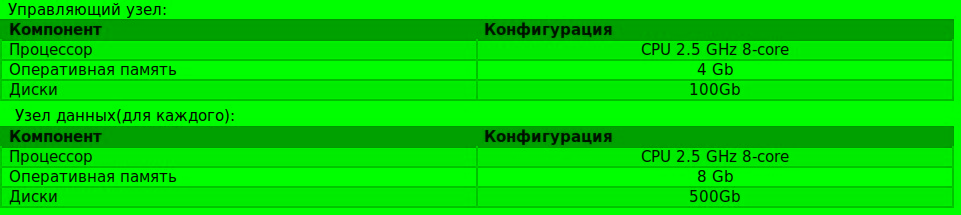

In [179]:
# do the same stuff but with the tensor
# copy the tensor and detach from computational graph
im3_tensor_green = im3_tensor.clone().detach()
im3_tensor_green[0,:,:] = 0
im3_tensor_green[2,:,:] = 0
transforms.ToPILImage()(im3_tensor_green)

In [185]:
im3_tensor.size()

torch.Size([3, 215, 961])

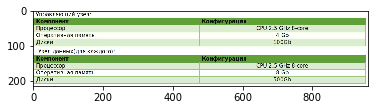

In [209]:
%matplotlib inline
import matplotlib.pyplot as plt
# display via matplotlib
# imshow needs row first and columns second
plt.imshow(im3_tensor.permute(1, 2, 0))

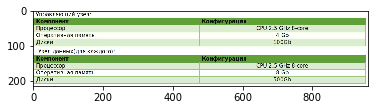

In [212]:
torch_im3 = torch.as_tensor(im3.getdata())
plt.imshow(torch_im3.view(im3.size[1],im3.size[0],-1))
plt.show()